<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Boston Housing Prices Final Project Notebook

#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment...

---

## Task 1: Become familiar with the dataset
### The following describes the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \\$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations
_For all visualizations, please include a title in each graph and appropriate labels_

### Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a **boxplot**
- Provide a  **bar plot** for the Charles river variable
- Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a **histogram** for the pupil to teacher ratio variable

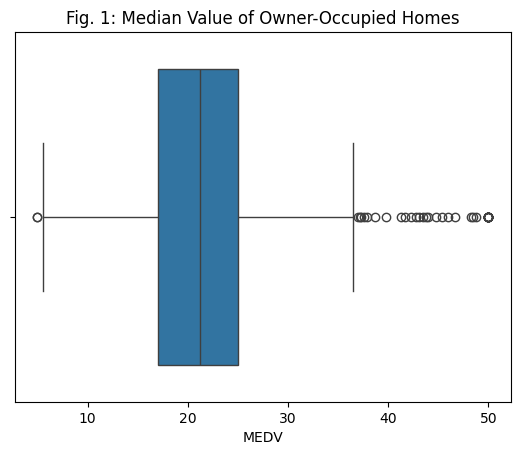

In [12]:
# Boxplot for the MEDV variable (Median value of owner-occupied homes)
medv_box = sns.boxplot(x='MEDV', data=boston_df)
medv_box.set_title('Fig. 1: Median Value of Owner-Occupied Homes')
pyplot.show()

In **Fig. 1** above, we can see that the median for the MEDV variable (median value of owner-occupied homes) is approx. \\$21,000 and the lower and upper quartiles are approx. \\$17,000 and \\$25,000 respectively, however there is a larger number of outliers at the higher end, suggesting that there a few towns that have much higher price than the majority.

Number of Tracts which DO NOT bound the Charles River: 471
Number of Tracts which DO bound the Charles River: 35


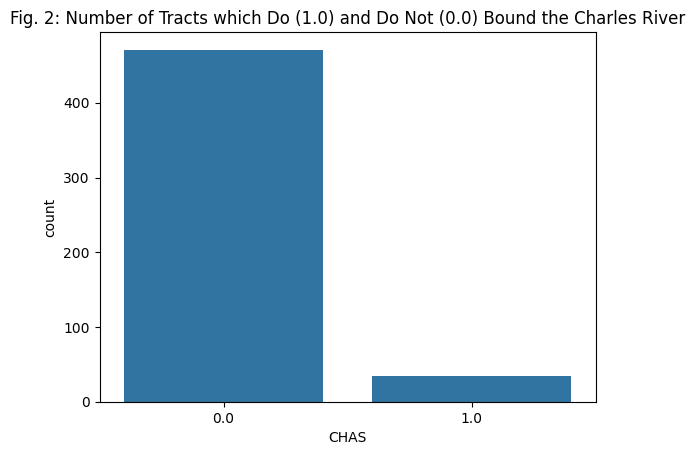

In [55]:
# Barplot (technically countplot) for the CHAS variable
print(f"Number of Tracts which DO NOT bound the Charles River: {len(boston_df[boston_df['CHAS'] == 0.0])}")
print(f"Number of Tracts which DO bound the Charles River: {len(boston_df[boston_df['CHAS'] == 1.0])}")
chas_bar = sns.countplot(x='CHAS', data=boston_df)
chas_bar.set_title('Fig. 2: Number of Tracts which Do (1.0) and Do Not (0.0) Bound the Charles River')
pyplot.show()

In **Fig. 2** above, we can see that there are 471 tracts which bound the Charles River and 35 which don't. This finding could be useful in further tests and analysis to suggest whether or not this has an effect on house pricing.

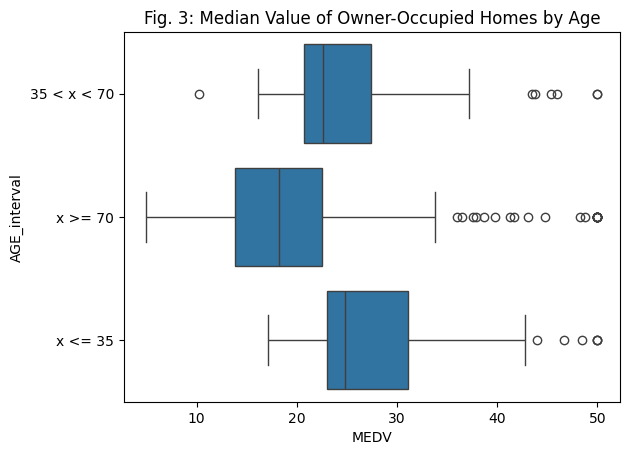

In [35]:
# Box plots for the MEDV variable sorted by age interval
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_interval'] = 'x <= 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_interval'] = '35 < x < 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_interval'] = 'x >= 70'

medv_age_box = sns.boxplot(x='MEDV', y='AGE_interval', data=boston_df)
medv_age_box.set_title('Fig. 3: Median Value of Owner-Occupied Homes by Age')
pyplot.show()

In **Fig. 3** above, we can see that the higher the AGE value (proprotion of owner-occupied units built prior to 1940), the lower the median value of owner-occupied homes, but for towns for which AGE >= 70, there are more outliers on the higher end. There doesn't seem to be a specific pattern in the IQRs, so we can't infer much about the consistency of the MEDV value by as the AGE value differs. 

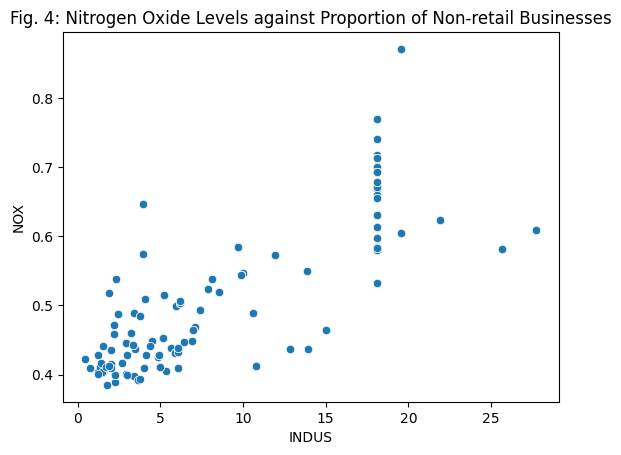

In [17]:
# Scatterplot of NOX levels against INDUS (proportion of non-retail businesses)
indus_nox_scatter = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
indus_nox_scatter.set_title('Fig. 4: Nitrogen Oxide Levels against Proportion of Non-retail Businesses')
pyplot.show()

In **Fig. 4** above, we can see that there is a fairly strong positive correlation between the proportion of non-retail businesses and the NOX levels, but whether is a causal relationship, we cannot be sure from this graph.

Median of the PTRATIO variable: 19.05
Mean of the PTRATIO variable: 18.46


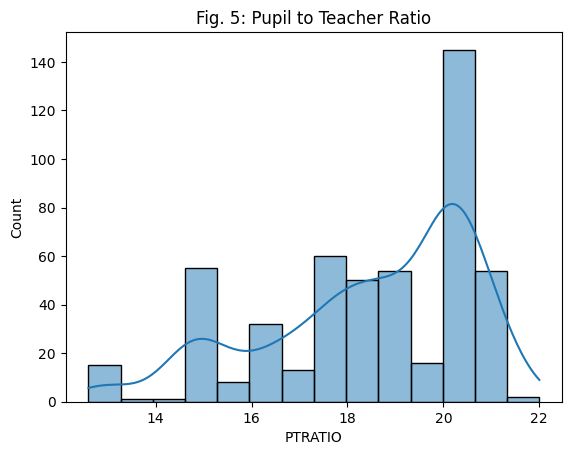

In [18]:
# Histogram for the PTRATIO variable
ptratio_hist = sns.histplot(x='PTRATIO', kde=True, data=boston_df)
print(f"Median of the PTRATIO variable: {boston_df['PTRATIO'].median()}")
print(f"Mean of the PTRATIO variable: {round(boston_df['PTRATIO'].mean(), 2)}")

ptratio_hist.set_title('Fig. 5: Pupil to Teacher Ratio')
pyplot.show()

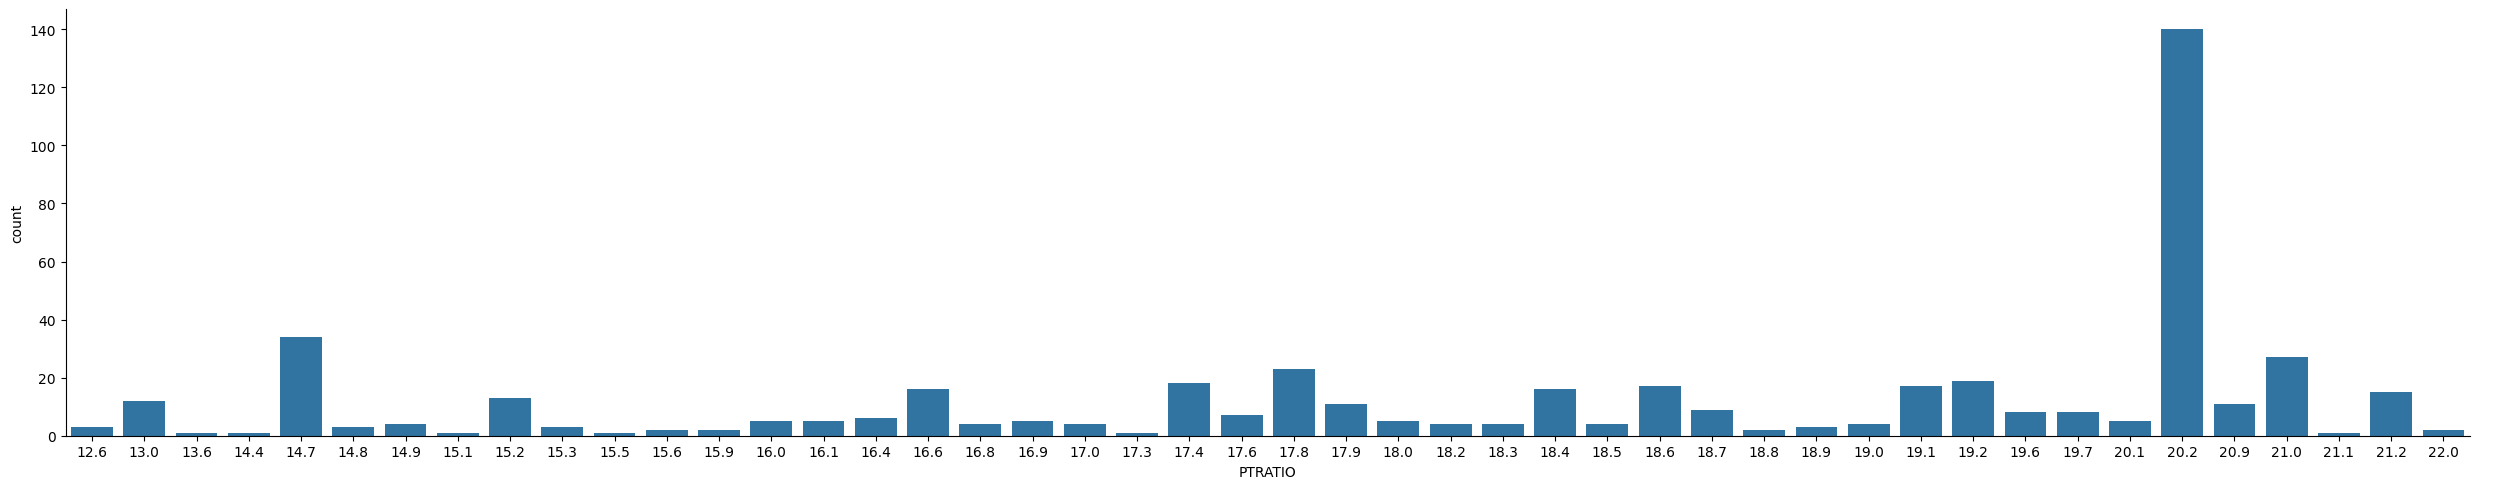

In [19]:
# Categorical scatterplot for the PTRATIO variable
ptratio_hist = sns.catplot(x='PTRATIO', kind='count', data=boston_df, height=5, aspect=5,)
pyplot.show()

In **Fig. 5** (and perhaps the categorical scatterplot above, but less clearly), we can see that the distribution of the PTRATIO variable is skewed to the left, as the mean is lower than the median. This means that most values are higher than the mean, but the most extreme values are less than the mean.

## Task 3: Use the appropriate tests to answer the questions provided.

**For each of the following questions:**
1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Be sure to:**
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

In [31]:
chas_medv_levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')
print(chas_medv_levene)

# Since the p-value is less than 0.05, we can assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)


In [40]:
chas_medv_ttest = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)
print(chas_medv_ttest)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


**Conclusion:** Since the p value is less than 0.05, we reject the null hypothesis. There's sufficient evidence to suggest that there is a difference in median value of houses bounded by the Charles River and those that are not.

### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [34]:
age_medv_levene = scipy.stats.levene(boston_df[boston_df['AGE_interval'] == 'x <= 35']['MEDV'],
                   boston_df[boston_df['AGE_interval'] == '35 < x < 70']['MEDV'], 
                   boston_df[boston_df['AGE_interval'] == 'x >= 70']['MEDV'], 
                   center='mean')
print(age_medv_levene)

# Since the p-value is greater than 0.05, we can't assume equal variance, but we will proceed with the ANOVA anyway

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)


In [39]:
thirtyfive_under = boston_df[boston_df['AGE_interval'] == 'x <= 35']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_interval'] == '35 < x < 70']['MEDV']
seventy_over = boston_df[boston_df['AGE_interval'] == 'x >= 70']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_under, thirtyfive_seventy, seventy_over)
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject H_0. There's significant evidence to suggest that a least one of the means differ.

### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ NOX concentration is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ NOX concentration is correlated with proportion of non-retail business acres per town

In [43]:
indus_nox_pearson = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(indus_nox_pearson)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


**Conclusion:** Since the p-value is less than 0.05, we reject H_0. There's significant evidence to suggest that there is a correlation between the two variables INDUS and NOX.

### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Firstly, I will create a scatterplot and then obtain Pearson's product moment correlation coefficient (PPMCC) for the two variables DIS and MEDV and p-value, for later comparison with those obtained using regression. Then, I will find the constant term before the DIS variable.

*   $H\_0:$ Median value of owner-occupied homes is not correlated with weighted distance to the five Boston employment centres
*   $H\_1:$ Median value of owner-occupied homes is correlated with weighted distance to the five Boston employment centres

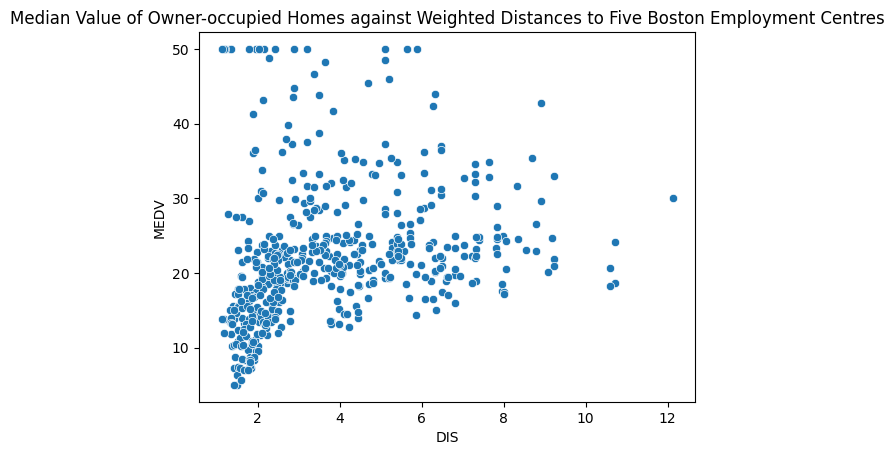

In [47]:
dis_medv_scatter = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
dis_medv_scatter.set_title('Median Value of Owner-occupied Homes against Weighted Distances to Five Boston Employment Centres')
pyplot.show()

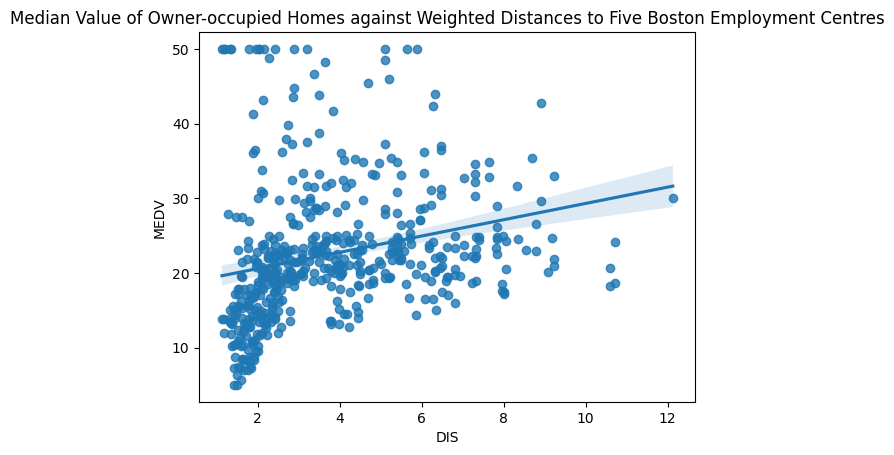

In [54]:
dis_medv_reg = sns.regplot(data=boston_df, x="DIS", y="MEDV")
dis_medv_reg.set_title('Median Value of Owner-occupied Homes against Weighted Distances to Five Boston Employment Centres')
pyplot.show()

In [51]:
dis_medv_pearson = scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])
print(dis_medv_pearson)
print(f"R-squared: {dis_medv_pearson[0]**2}")

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)
R-squared: 0.06246437212178246


In [48]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        15:37:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** We can see that the correlation coefficient squared (R-squared) and p-value are approx. the same for both the correlation test and regression. The constant/coefficient for the independent variable DIS is approx. 18.4, meaning that as the weighted distance to five Boston employment centres increases by 18.4 units, the median value of owner occupied homes increases by \$1,000.

---